In [1]:
import numpy as np
import torch
import random
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:64'

import utils

%load_ext autoreload
%autoreload 2

/Users/paul/anaconda3/envs/acd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Global variable model:

model_name = 'openai-community/gpt2' #"openai-community/gpt2-xl" #"meta-llama/Llama-2-7b-hf" #openai-community/gpt2-xl 'microsoft/Phi-3-mini-4k-instruct
dataset_path = 'datasets/hc_animal_phi3_inputs.csv' #'datasets/(non)animal_2000_gpt-4-turbo.csv'

# Load model and dataset
model = utils.LinearFeatureWrapper(model_name, dataset_path, 'Animal', 'Non-Animal', True)
model_hf = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype = 'auto',  trust_remote_code=True)
tokenizer_hf = AutoTokenizer.from_pretrained(model_name)
model.set_model_tokenizer(model_hf, tokenizer_hf)
model.set_layers(model.model.transformer.h) # Depends on model! Typically model.model.model.layers. For gpt2: model.model.transformer.h

In [3]:
# Global variables after loading model and data 
num_detector_samples = 256 # Number of samples to construct the detector

batch_size = 2 # Batch size for detector construction. 256 works well for Phi3 on ilikecats
max_tokens = None # If none, uses maximum length of the dataset

model.get_pos_neg_activations(num_detector_samples, max_tokens, batch_size)

Processing batch 1/129
Processing batch 2/129
Processing batch 3/129
Processing batch 4/129
Processing batch 5/129


KeyboardInterrupt: 

In [ ]:
# model.plot_pca()

In [ ]:
model.calculate_detector_direction()

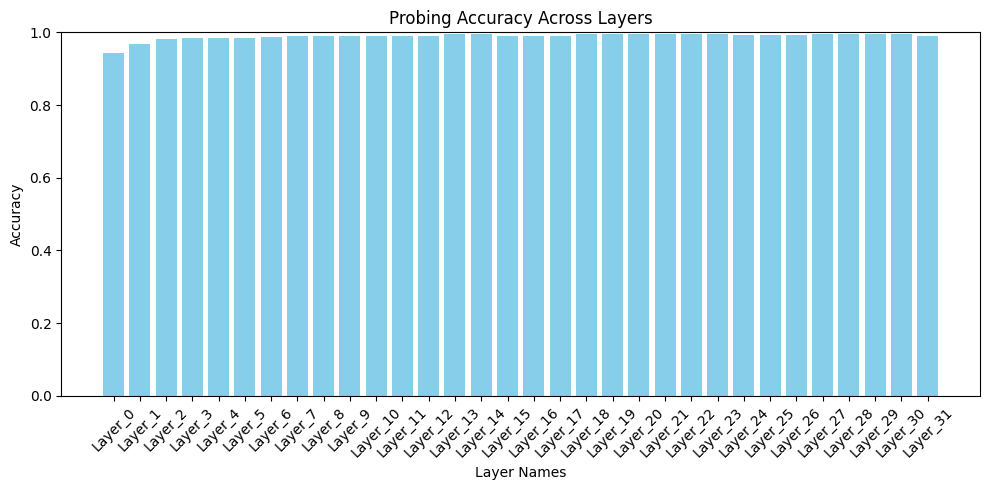

{'Layer_0': 0.941923774954628,
 'Layer_1': 0.969147005444646,
 'Layer_2': 0.9818511796733213,
 'Layer_3': 0.9836660617059891,
 'Layer_4': 0.985480943738657,
 'Layer_5': 0.985480943738657,
 'Layer_6': 0.9872958257713249,
 'Layer_7': 0.9891107078039928,
 'Layer_8': 0.9909255898366606,
 'Layer_9': 0.9909255898366606,
 'Layer_10': 0.9909255898366606,
 'Layer_11': 0.9891107078039928,
 'Layer_12': 0.9891107078039928,
 'Layer_13': 0.9945553539019963,
 'Layer_14': 0.9945553539019963,
 'Layer_15': 0.9909255898366606,
 'Layer_16': 0.9909255898366606,
 'Layer_17': 0.9909255898366606,
 'Layer_18': 0.9945553539019963,
 'Layer_19': 0.9945553539019963,
 'Layer_20': 0.9945553539019963,
 'Layer_21': 0.9945553539019963,
 'Layer_22': 0.9945553539019963,
 'Layer_23': 0.9945553539019963,
 'Layer_24': 0.9927404718693285,
 'Layer_25': 0.9927404718693285,
 'Layer_26': 0.9927404718693285,
 'Layer_27': 0.9945553539019963,
 'Layer_28': 0.9945553539019963,
 'Layer_29': 0.9945553539019963,
 'Layer_30': 0.994555353

In [ ]:
model.train_and_evaluate_probes()

Processing batch 1/65
Processing batch 2/65
Processing batch 3/65
Processing batch 4/65
Processing batch 5/65
Processing batch 6/65
Processing batch 7/65
Processing batch 8/65
Processing batch 9/65
Processing batch 10/65
Processing batch 11/65
Processing batch 12/65
Processing batch 13/65
Processing batch 14/65
Processing batch 15/65
Processing batch 16/65
Processing batch 17/65
Processing batch 18/65
Processing batch 19/65
Processing batch 20/65
Processing batch 21/65
Processing batch 22/65
Processing batch 23/65
Processing batch 24/65
Processing batch 25/65
Processing batch 26/65
Processing batch 27/65
Processing batch 28/65
Processing batch 29/65
Processing batch 30/65
Processing batch 31/65
Processing batch 32/65
Processing batch 33/65
Processing batch 34/65
Processing batch 35/65
Processing batch 36/65
Processing batch 37/65
Processing batch 38/65
Processing batch 39/65
Processing batch 40/65
Processing batch 41/65
Processing batch 42/65
Processing batch 43/65
Processing batch 44/

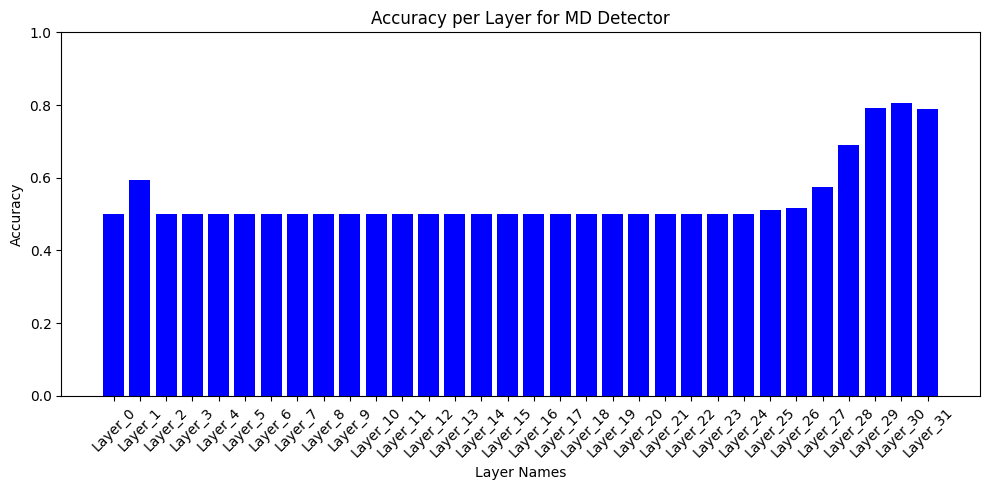

{'Layer_0': 0.5,
 'Layer_1': 0.59375,
 'Layer_2': 0.5,
 'Layer_3': 0.5,
 'Layer_4': 0.5,
 'Layer_5': 0.5,
 'Layer_6': 0.5,
 'Layer_7': 0.5,
 'Layer_8': 0.5,
 'Layer_9': 0.5,
 'Layer_10': 0.5,
 'Layer_11': 0.5,
 'Layer_12': 0.5,
 'Layer_13': 0.5,
 'Layer_14': 0.5,
 'Layer_15': 0.5,
 'Layer_16': 0.5,
 'Layer_17': 0.5,
 'Layer_18': 0.5,
 'Layer_19': 0.5,
 'Layer_20': 0.5,
 'Layer_21': 0.5,
 'Layer_22': 0.5,
 'Layer_23': 0.5,
 'Layer_24': 0.5,
 'Layer_25': 0.51171875,
 'Layer_26': 0.515625,
 'Layer_27': 0.57421875,
 'Layer_28': 0.69140625,
 'Layer_29': 0.79296875,
 'Layer_30': 0.8046875,
 'Layer_31': 0.7890625}

In [ ]:
# Get dataset for testing direction detector
num_test_samples = 256 # Number of samples to test the detector
# batch_size = None # Batch size for detector construction. 256 works well for Phi3 on ilikecats
# max_tokens = None # If none, uses maximum length of the dataset

test_dataset = dataset = utils.Dataset()
test_dataset.load_data(dataset_path, 'Animal', 'Non-Animal')
test_data, labels = test_dataset.combine_dataset_get_labels(num_test_samples)

model.evaluate_MD_detector(test_data, labels, max_tokens, batch_size)